For this project, we adopted two different datasets, mentioned below.

ASL alphabet dataset : https://www.kaggle.com/datasets/grassknoted/asl-alphabet

Chatbot dataset : https://www.kaggle.com/datasets/kreeshrajani/3k-conversations-dataset-for-chatbot

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import re
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

## Chatbot Dataset - EDA and preprocessing

In [ ]:
chatbot_df = pd.read_csv('Conversation.csv')
chatbot_df = chatbot_df.drop(columns = ['Unnamed: 0'])

In [ ]:
chatbot_df.head()

question  \
0               hi, how are you doing?   
1        i'm fine. how about yourself?   
2  i'm pretty good. thanks for asking.   
3    no problem. so how have you been?   
4     i've been great. what about you?   

                                     answer  
0             i'm fine. how about yourself?  
1       i'm pretty good. thanks for asking.  
2         no problem. so how have you been?  
3          i've been great. what about you?  
4  i've been good. i'm in school right now.

In [ ]:
chatbot_df.shape

(3725, 2)

#### EDA

EDA was performed by following a similar procedure to the one described by Singh (n.d.).

References:
Singh, H. (n.d.). Complete Guide to EDA on Text Data. Kaggle. https://www.kaggle.com/code/harshsingh2209/complete-guide-to-eda-on-text-data

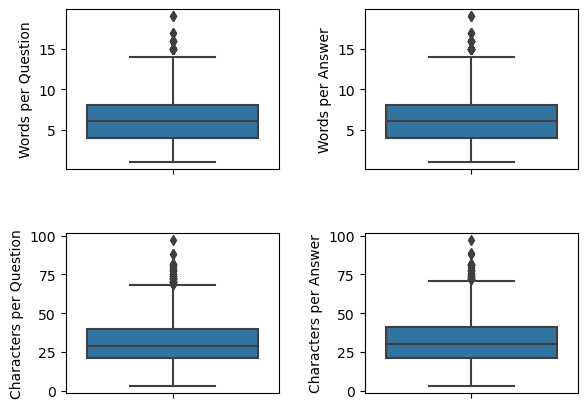

In [ ]:
# Function to count the number of words in a sentence
def count_words(text):
    words = text.split() # extract the words from text
    num_words = len(words) # count the number of words
    return num_words

# Function to count the number of characters in a sentence
def count_characters(text):
    num_char = len(text) # count the number of chatacters
    return num_char

num_words_question = chatbot_df['question'].apply(count_words)
num_words_answer = chatbot_df['answer'].apply(count_words)
num_char_question = chatbot_df['question'].apply(count_characters)
num_char_answer = chatbot_df['answer'].apply(count_characters)

plt.subplot(2, 2, 1)
sns.boxplot(y = num_words_question)
plt.ylabel('Words per Question')
plt.subplot(2, 2, 2)
sns.boxplot(y = num_words_answer)
plt.ylabel('Words per Answer')
plt.subplot(2, 2, 3)
sns.boxplot(y = num_char_question)
plt.ylabel('Characters per Question')
plt.subplot(2, 2, 4)
sns.boxplot(y = num_char_answer)
plt.ylabel('Characters per Answer')
plt.subplots_adjust(left = 0.1, bottom = 0.1, right = 0.9, top = 0.9, wspace = 0.4, hspace = 0.4)
plt.savefig('Figure3.png')
plt.show()

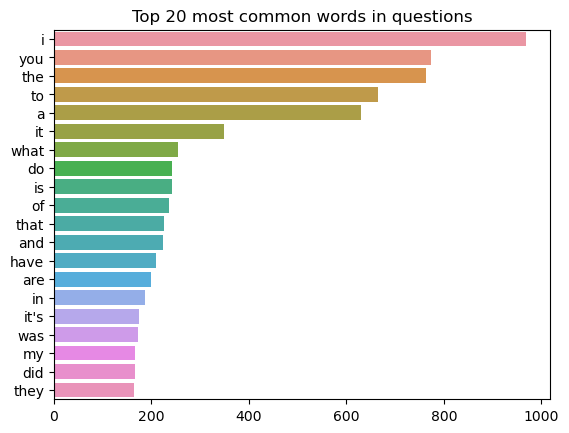

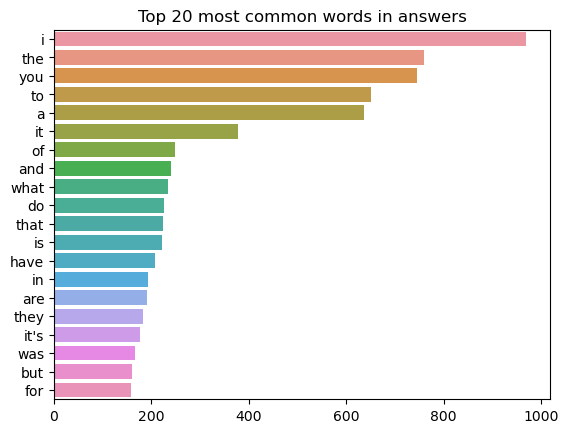

In [ ]:
# Identify the most frequent words in the question/answer columns

# Function to get the list of words in a sentence
def list_words(text):
    words = text.split() # extract the words from text
    return words

# Function to get the top 20 most common words and their counts
def words_freq(mostcommon):
    words = []
    counts = []
    for word, count in mostcommon:
        words.append(word)
        counts.append(count)
    return words, counts

words_question = chatbot_df['question'].apply(list_words)
words_answer = chatbot_df['answer'].apply(list_words)
corpus_question = []
for jj in range(len(words_question)):
    corpus_question += words_question[jj] # all the words in all the questions
corpus_answer = []
for jj in range(len(words_answer)):
    corpus_answer += words_answer[jj] # all the words in all the answers
mostcommon_words_question = Counter(corpus_question).most_common(20) # 20 most common words in all the questions
mostcommon_words_answer = Counter(corpus_answer).most_common(20) # 20 most common words in all the answers
words_question, counts_question = words_freq(mostcommon_words_question) # top 20 most common words and their counts in questions
words_answer, counts_answer = words_freq(mostcommon_words_answer) # top 20 most common words and their counts in answers

sns.barplot(x = counts_question, y = words_question)
plt.title('Top 20 most common words in questions')
plt.show()

sns.barplot(x = counts_answer, y = words_answer)
plt.title('Top 20 most common words in answers')
plt.show()

#### Preprocessing

In [ ]:
# Function to remove punctuation and apply lowercase
def clear_text(text):
    text = re.sub(r'[^\w\s]', '', text) # remove punctuation
    # words = text.split() # extract the words from text
    # text = ' '.join([word for word in text.split() if word not in stop_words]) # remove stop words
    text = text.lower() # apply lowercasing
    return text

chatbot_df['question'] = chatbot_df['question'].apply(clear_text)
chatbot_df['answer'] = chatbot_df['answer'].apply(clear_text)
chatbot_df.head()

question                                answer
0              hi how are you doing            im fine how about yourself
1        im fine how about yourself      im pretty good thanks for asking
2  im pretty good thanks for asking       no problem so how have you been
3   no problem so how have you been         ive been great what about you
4     ive been great what about you  ive been good im in school right now

In [ ]:
# Tokenization
chatbot_df['token_question'] = chatbot_df['question'].apply(nltk.word_tokenize)
chatbot_df['token_answer'] = chatbot_df['answer'].apply(nltk.word_tokenize)
chatbot_df.head()

question                                answer  \
0              hi how are you doing            im fine how about yourself   
1        im fine how about yourself      im pretty good thanks for asking   
2  im pretty good thanks for asking       no problem so how have you been   
3   no problem so how have you been         ive been great what about you   
4     ive been great what about you  ive been good im in school right now   

                            token_question  \
0               [hi, how, are, you, doing]   
1         [im, fine, how, about, yourself]   
2  [im, pretty, good, thanks, for, asking]   
3  [no, problem, so, how, have, you, been]   
4     [ive, been, great, what, about, you]   

                                    token_answer  
0               [im, fine, how, about, yourself]  
1        [im, pretty, good, thanks, for, asking]  
2        [no, problem, so, how, have, you, been]  
3           [ive, been, great, what, about, you]  
4  [ive, been, good, im, in, school, right, now]

In [ ]:
# Lemmatization

# Function to obtain the right positional tagging prior to lemmatization
# Same function presented in Python – Lemmatization Approaches with Examples (n.d.)
def right_pos_tagging(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

# Obtain the right positional tagging prior to lemmatization
# Positional tags were modified as suggested by Python – Lemmatization Approaches with Examples (n.d.)

tokens = chatbot_df['token_question']
new_tag_tokens = []
for jj in range(len(tokens)):
    tokens_jj = tokens[jj] # tokens at the jjth row
    tag_tokens_jj = nltk.pos_tag(tokens_jj) # POS tags for the generic tokens_jj
    new_tag_tokens.append(list(map(lambda x: (x[0], right_pos_tagging(x[1])), tag_tokens_jj))) # modified POS tags for the generic tokens_jj (as Python – Lemmatization Approaches with Examples, n.d.)
tagged_token_question = new_tag_tokens

tokens = chatbot_df['token_answer']
new_tag_tokens = []
for jj in range(len(tokens)):
    tokens_jj = tokens[jj] # tokens at the jjth row
    tag_tokens_jj = nltk.pos_tag(tokens_jj) # POS tags for the generic tokens_jj
    new_tag_tokens.append(list(map(lambda x: (x[0], right_pos_tagging(x[1])), tag_tokens_jj))) # modified POS tags for the generic tokens_jj (as Python – Lemmatization Approaches with Examples, n.d.)
tagged_token_answer = new_tag_tokens

# Implement lemmatization on the tokens
# A procedure similar to the one described in Python – Lemmatization Approaches with Examples (n.d.) and by Kumar (2021) was applied

wnl = WordNetLemmatizer()
Lemmatization = []
for jj in range(len(tagged_token_question)):
    lemmatized_question = []
# Same lines of codes used in Python – Lemmatization Approaches with Examples (n.d.)
    for word, tag in tagged_token_question[jj]:
        if tag is None:
            lemmatized_question.append(word)
        else:
            lemmatized_question.append(wnl.lemmatize(word, tag))
    Lemmatization.append(lemmatized_question)
chatbot_df['lem_question'] = Lemmatization

Lemmatization = []
for jj in range(len(tagged_token_answer)):
    lemmatized_answer = []
# Same lines of codes used in Python – Lemmatization Approaches with Examples (n.d.)
    for word, tag in tagged_token_answer[jj]:
        if tag is None:
            lemmatized_answer.append(word)
        else:
            lemmatized_answer.append(wnl.lemmatize(word, tag))
    Lemmatization.append(lemmatized_answer)
chatbot_df['lem_answer'] = Lemmatization

chatbot_df.head()

# References
# Kumar, R. (2021, August 6). Natural Language Processing | Text Preprocessing | Spacy vs NLTK. Medium. https://medium.com/nerd-for-tech/natural-language-processing-text-preprocessing-spacy-vs-nltk-b70b734f5560
# Python – Lemmatization Approaches with Examples. (n.d.). Geeks for Geeks.  https://www.geeksforgeeks.org/python-lemmatization-approaches-with-examples/

question                                answer  \
0              hi how are you doing            im fine how about yourself   
1        im fine how about yourself      im pretty good thanks for asking   
2  im pretty good thanks for asking       no problem so how have you been   
3   no problem so how have you been         ive been great what about you   
4     ive been great what about you  ive been good im in school right now   

                            token_question  \
0               [hi, how, are, you, doing]   
1         [im, fine, how, about, yourself]   
2  [im, pretty, good, thanks, for, asking]   
3  [no, problem, so, how, have, you, been]   
4     [ive, been, great, what, about, you]   

                                    token_answer  \
0               [im, fine, how, about, yourself]   
1        [im, pretty, good, thanks, for, asking]   
2        [no, problem, so, how, have, you, been]   
3           [ive, been, great, what, about, you]   
4  [ive, been, good, im, in, school, right, now]   

                            lem_question  \
0                 [hi, how, be, you, do]   
1       [im, fine, how, about, yourself]   
2   [im, pretty, good, thanks, for, ask]   
3  [no, problem, so, how, have, you, be]   
4     [ive, be, great, what, about, you]   

                                    lem_answer  
0             [im, fine, how, about, yourself]  
1         [im, pretty, good, thanks, for, ask]  
2        [no, problem, so, how, have, you, be]  
3           [ive, be, great, what, about, you]  
4  [ive, be, good, im, in, school, right, now]